In [122]:
import pandas as pd

# Load the dataset with specified columns
columns_to_use = ['order_type_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 
                  'reporting_classification', 'order_date', 'line_number', 'invoice_number', 'invoice_date', 'currency']

df = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1', usecols=columns_to_use, low_memory=False)

print(df.head())

  reporting_classification order_type_code  value_sales  value_cost  \
0            Discontinuing             NOR       218.40    178.1976   
1            Discontinuing             NOR        38.28     25.4568   
2            Discontinuing             NOR        40.20     25.4568   
3            Discontinuing             EDI        20.10     12.7284   
4            Discontinuing             EDI        19.14     12.7284   

   value_quantity  value_price_adjustment currency  invoice_number  \
0            84.0                       0      AUD         2217887   
1            12.0                       0      AUD         2185745   
2            12.0                       0      AUD         2217807   
3             6.0                       0      AUD         2222758   
4             6.0                       0      AUD         2170374   

   line_number  invoice_date  order_date  
0            1      20120509    20120509  
1            1      20120216    20120216  
2            1      201

In [124]:
#Check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037205 entries, 0 to 1037204
Data columns (total 11 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   reporting_classification  1037205 non-null  object 
 1   order_type_code           1037205 non-null  object 
 2   value_sales               1037205 non-null  float64
 3   value_cost                1037205 non-null  float64
 4   value_quantity            1037205 non-null  float64
 5   value_price_adjustment    1037205 non-null  int64  
 6   currency                  1037205 non-null  object 
 7   invoice_number            1037205 non-null  int64  
 8   line_number               1037205 non-null  int64  
 9   invoice_date              1037205 non-null  int64  
 10  order_date                1037205 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 87.0+ MB
None


In [126]:
#Convert date columns
df['order_date'] = pd.to_datetime(df['order_date'],errors='coerce')
df['invoice_date'] = pd.to_datetime(df['invoice_date'],errors='coerce')

In [128]:
#Check for missing values in percentage
# Display missing values in percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

reporting_classification    0.0
order_type_code             0.0
value_sales                 0.0
value_cost                  0.0
value_quantity              0.0
value_price_adjustment      0.0
currency                    0.0
invoice_number              0.0
line_number                 0.0
invoice_date                0.0
order_date                  0.0
dtype: float64


In [148]:
# Check for duplicates in the 'invoice_number' column and save them in '2012_duplicates'
duplicates = df[df.duplicated(subset=['invoice_number'], keep=False)]
duplicates.to_csv('2012_duplicates.csv', index=False)  # Save duplicates to a new dataset

# Load the new dataset (optional, if you want to work directly with the saved file)
duplicates = pd.read_csv('2012_duplicates.csv')

# Group by 'invoice_number' and count occurrences for each duplicate invoice
duplicate_counts = duplicates.groupby('invoice_number').size().reset_index(name='duplicate_count')

# Display the result
print("Number of occurrences for each duplicate invoice number:")
print(duplicate_counts)

Number of occurrences for each duplicate invoice number:
        invoice_number  duplicate_count
0                  122                2
1                  132                2
2                  137                2
3                  140                2
4                  156                3
...                ...              ...
169565         7002352                9
169566         7002353                9
169567         7002354              105
169568         7002355                7
169569         7002356               68

[169570 rows x 2 columns]


In [ ]:
#Inconsistency or Outlier Values

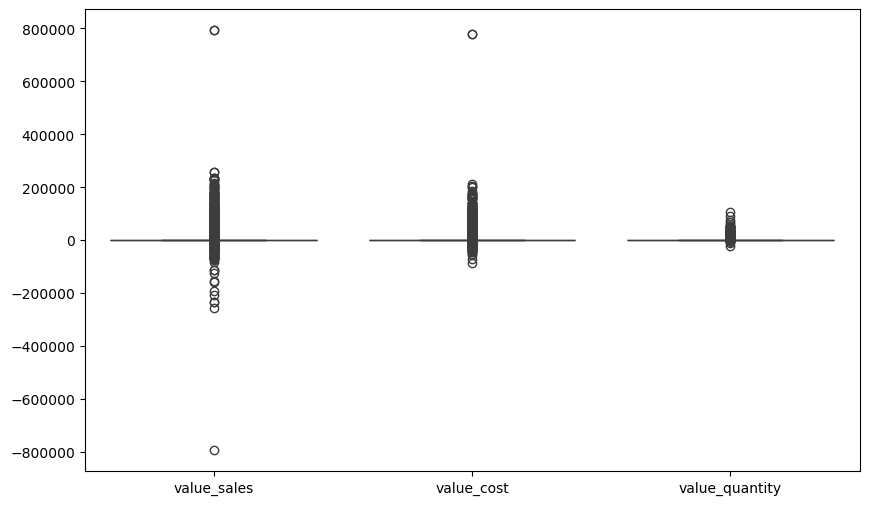

In [77]:
#outliers

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df[['value_sales', 'value_cost', 'value_quantity']])
plt.show()  # Visualize outliers using a boxplot


In [55]:
#Ensure categorical columns have consistent values (no typos or wrong categories)

print(df['order_type_code'].unique())
print(df['reporting_classification'].unique())
print(df['currency'].unique())

['NOR' 'EDI' 'CDG' 'PRO' 'NOS' 'CRR' 'EXP' 'EDS' 'CSH' 'PRD' 'CRD' 'NOH'
 'COP' 'OBS' 'MIN' 'COA' 'PSA' 'PPD' 'WDC' 'PMO' 'CPR' 'CRP' 'PM0' 'PGS'
 'SPL' 'AES' 'ZCG' 'ZCR' 'SPC' 'ZOP' 'ZC2' '5TN' 'PUP' 'PPO' 'ZD3' 'CSO']
['Discontinuing' 'Continuing']
['AUD' 'USD' 'AUS' 'NZD' '   ' 'EUR']


In [80]:
df2 = pd.read_csv('2013_Data.csv',encoding='ISO-8859-1',usecols=columns_to_use, low_memory = False)

In [64]:
#Check for missing values
missing_percentage2 = (df2.isnull().sum() / len(df2)) * 100
print(missing_percentage2)

reporting_classification    0.0
order_type_code             0.0
value_sales                 0.0
value_cost                  0.0
value_quantity              0.0
value_price_adjustment      0.0
currency                    0.0
invoice_number              0.0
line_number                 0.0
invoice_date                0.0
order_date                  0.0
dtype: float64


In [150]:
# Check for duplicates in the 'invoice_number' column and save them in '2012_duplicates'
duplicates = df2[df2.duplicated(subset=['invoice_number'], keep=False)]
duplicates.to_csv('2013_duplicates.csv', index=False)  # Save duplicates to a new dataset

# Load the new dataset (optional, if you want to work directly with the saved file)
duplicates = pd.read_csv('2013_duplicates.csv')

# Group by 'invoice_number' and count occurrences for each duplicate invoice
duplicate_counts = duplicates.groupby('invoice_number').size().reset_index(name='duplicate_count')

# Display the result
print("Number of occurrences for each duplicate invoice number:")
print(duplicate_counts)

Number of occurrences for each duplicate invoice number:
        invoice_number  duplicate_count
0                    0              167
1                  362                4
2                  363                2
3                  366                2
4                  367                2
...                ...              ...
155341         7003017               63
155342         7003018               19
155343         7003019                3
155344         7003020               67
155345         7003021               13

[155346 rows x 2 columns]


In [71]:
#Data type check
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951177 entries, 0 to 951176
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   reporting_classification  951177 non-null  object 
 1   order_type_code           951177 non-null  object 
 2   value_sales               951177 non-null  float64
 3   value_cost                951177 non-null  float64
 4   value_quantity            951177 non-null  float64
 5   value_price_adjustment    951177 non-null  int64  
 6   currency                  951177 non-null  object 
 7   invoice_number            951177 non-null  int64  
 8   line_number               951177 non-null  int64  
 9   invoice_date              951177 non-null  int64  
 10  order_date                951177 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 79.8+ MB
None


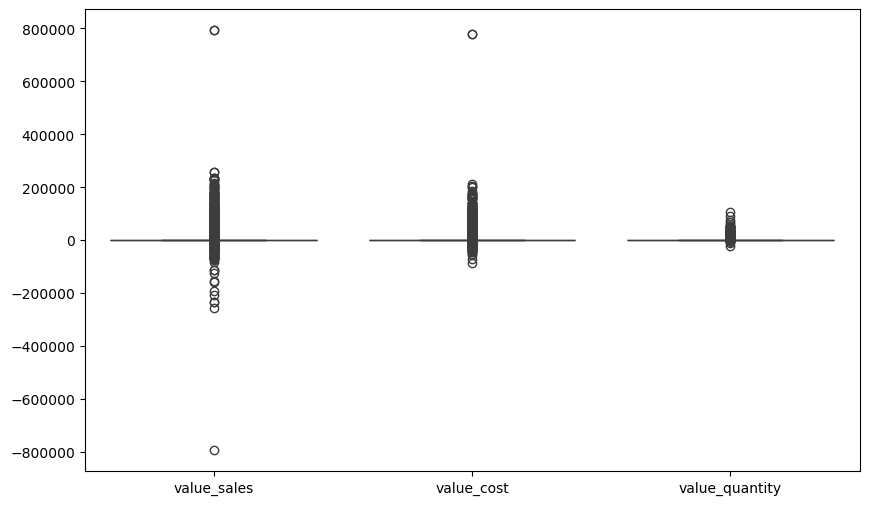

In [81]:
#outliers

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df2[['value_sales', 'value_cost', 'value_quantity']])
plt.show()  # Visualize outliers using a boxplot


In [86]:
#Clean Categorical Columns

print(df['order_type_code'].unique())
print(df['reporting_classification'].unique())
print(df['currency'].unique())

['CRR' 'NOR' 'CRD' 'PRO' 'CSH' 'PRD' 'PPO' 'EXP' 'PUP' 'CDG' 'EDI' 'ZCR'
 'NOS' 'NOH' 'AES' 'CPR' 'ZCG' 'SPC' 'EDS' 'PMO' 'CRP' 'COP' 'MIN' 'PSA'
 'SPL' 'COA' '5TN' 'WDC' 'PPD' 'OBS' 'CSO' 'PME']
['Continuing' 'Discontinuing']
['AUD' 'AUS' 'NZD' 'USD' '   ']


**2012 returned customers**

In [229]:
import pandas as pd

# Load your data
df = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1', low_memory=False)

# Ensure 'invoice_date' column is in datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Sort by customer ID and invoice date to calculate the time difference between purchases
df = df.sort_values(by=['customer_code', 'invoice_date'])

# Calculate the difference in days between each invoice for the same customer
df['days_between'] = df.groupby('customer_code')['invoice_date'].diff().dt.days

# Filter for return periods between 90 and 180 days (approximately 3 to 6 months)
returned_customers = df[(df['days_between'] >= 90) & (df['days_between'] <= 180)]

# Count the number of return events in the 3-6 month range for each customer
return_counts = returned_customers.groupby('customer_code').size().reset_index(name='return_count')

# Print customer code and the number of times they returned within 3-6 months
print("Customer return counts within 3-6 months:")
print(return_counts)

Customer return counts within 3-6 months:
Empty DataFrame
Columns: [customer_code, return_count]
Index: []


**2013 returned customers**

In [208]:
import pandas as pd

# Load your data
df3 = pd.read_csv('2013_Data.csv', encoding='ISO-8859-1', low_memory=False)

# Ensure 'invoice_date' column is in datetime format
df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])

# Sort by customer ID and invoice date to calculate the time difference between purchases
df3 = df3.sort_values(by=['customer_code', 'invoice_date'])

# Calculate the difference in days between each invoice for the same customer
df3['days_between'] = df3.groupby('customer_code')['invoice_date'].diff().dt.days

# Filter for return periods between 90 and 180 days (approximately 3 to 6 months)
returned_customers = df3[(df3['days_between'] >= 90) & (df3['days_between'] <= 180)]

# Count the number of return events in the 3-6 month range for each customer
return_counts = returned_customers.groupby('customer_code').size().reset_index(name='return_count')

# Print customer code and the number of times they returned within 3-6 months
print("Customer return counts within 3-6 months:")
print(return_counts)


Customer return counts within 3-6 months:
Empty DataFrame
Columns: [customer_code, return_count]
Index: []


In [214]:
import pandas as pd

# Try using ISO-8859-1 encoding
df2012 = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1', low_memory=False)

# Proceed with your analysis
invoice_counts = df2012['invoice_number'].value_counts()
print(invoice_counts)

invoice_number
7002085    897
7002043    776
7002264    677
7002261    629
7002259    548
          ... 
712002       1
736379       1
739903       1
639886       1
766287       1
Name: count, Length: 341877, dtype: int64


In [216]:
import pandas as pd

# Try using ISO-8859-1 encoding
df2013 = pd.read_csv('2013_Data.csv', encoding='ISO-8859-1', low_memory=False)

# Proceed with your analysis
invoice_counts = df2013['invoice_number'].value_counts()
print(invoice_counts)

invoice_number
7002633    468
7002650    341
789646     259
7002828    249
7002462    245
          ... 
805008       1
643666       1
803058       1
809947       1
2383667      1
Name: count, Length: 333798, dtype: int64


In [221]:
import pandas as pd

# Load df2012
df2012 = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1', low_memory=False)

# Filter invoices with 1 to 5 digits
short_invoices_2012 = df2012[df2012['invoice_number'].astype(str).str.len().between(1, 5)]

# Group by invoice number and summarize total entries, sales value, and unique customer codes
summary_2012 = short_invoices_2012.groupby('invoice_number').agg(
    total_entries=('invoice_number', 'size'),
    total_sales_value=('value_sales', 'sum'),   # replace 'value_sales' with actual sales column if different
    customer_codes=('customer_code', 'unique')  # replace 'customer_code' with actual customer code column if different
).reset_index()

print("Summary of Invoices with 1 to 5 Digits in 2012:")
print(summary_2012)


Summary of Invoices with 1 to 5 Digits in 2012:
      invoice_number  total_entries  total_sales_value customer_codes
0                  0              1               0.00    [234750001]
1                116              1            4478.00    [201940001]
2                117              1            3081.00    [202900200]
3                118              1             249.99    [202900200]
4                119              1            9920.00    [300115801]
...              ...            ...                ...            ...
4821           36839              1             500.00    [600095010]
4822           36840             15           36652.10    [649111601]
4823           36841              1             256.00    [650000504]
4824           36842              3            1684.00    [552800304]
4825           36843              1              49.86    [649111601]

[4826 rows x 4 columns]


In [223]:
import pandas as pd

# Load df2013
df2013 = pd.read_csv('2013_Data.csv', encoding='ISO-8859-1', low_memory=False)

# Filter invoices with 1 to 5 digits
short_invoices_2013 = df2013[df2013['invoice_number'].astype(str).str.len().between(1, 5)]

# Group by invoice number and summarize total entries, sales value, and unique customer codes
summary_2013 = short_invoices_2013.groupby('invoice_number').agg(
    total_entries=('invoice_number', 'size'),
    total_sales_value=('value_sales', 'sum'),   # replace 'value_sales' with actual sales column if different
    customer_codes=('customer_code', 'unique')  # replace 'customer_code' with actual customer code column if different
).reset_index()

print("Summary of Invoices with 1 to 5 Digits in 2013:")
print(summary_2013)


Summary of Invoices with 1 to 5 Digits in 2013:
       invoice_number  total_entries  total_sales_value  \
0                   0            167           33086.01   
1                 362              4            1766.16   
2                 363              2            9359.60   
3                 364              1              45.36   
4                 365              1            1702.40   
...               ...            ...                ...   
12887           40589              3           14897.81   
12888           40590              1               0.00   
12889           40591              3            6434.60   
12890           40592              2            1219.58   
12891           40593              1            1330.70   

                                          customer_codes  
0      [124760100, 113000100, 138845501, 234750001, 1...  
1                                            [201987100]  
2                                            [201987100]  
3      

In [225]:
import pandas as pd

# Load your dataset (assuming it’s already loaded as df2012)
# df2012 = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1', low_memory=False)

# Define credit-related order types
credit_order_types = ['CRR', 'CDG', 'CRD']

# Filter for negative sales values with credit-related order types
df2012_credit_neg = df2012[(df2012['value_sales'] < 0) & (df2012['order_type_code'].isin(credit_order_types))]

# Summarize credit-related entries by region, product, and invoice number
summary_2012 = df2012_credit_neg.groupby(['customer_district_code', 'item_code', 'invoice_number']).agg(
    total_entries=('invoice_number', 'size'),
    total_sales_value=('value_sales', 'sum')
).reset_index()

# Display the summarized results
print("Summary of Credit-Related Negative Sales Entries in 2012:")
print(summary_2012)


Summary of Credit-Related Negative Sales Entries in 2012:
       customer_district_code                       item_code  invoice_number  \
0                         200                           10000          260865   
1                         200                           10000          261823   
2                         200                           10000          262285   
3                         200                           10000          264903   
4                         200                           10000          268363   
...                       ...                             ...             ...   
52797                     720  Z30066                                  639940   
52798                     720  Z30068                                  639940   
52799                     720  Z60152                                  639940   
52800                     720  Z63215                                  639940   
52801                     720  Z67025              

In [227]:
# Assuming df2013 is already loaded
# df2013 = pd.read_csv('2013_Data.csv', encoding='ISO-8859-1', low_memory=False)

# Filter for negative sales values with credit-related order types
df2013_credit_neg = df2013[(df2013['value_sales'] < 0) & (df2013['order_type_code'].isin(credit_order_types))]

# Summarize credit-related entries by region, product, and invoice number
summary_2013 = df2013_credit_neg.groupby(['customer_district_code', 'item_code', 'invoice_number']).agg(
    total_entries=('invoice_number', 'size'),
    total_sales_value=('value_sales', 'sum')
).reset_index()

# Display the summarized results
print("Summary of Credit-Related Negative Sales Entries in 2013:")
print(summary_2013)


Summary of Credit-Related Negative Sales Entries in 2013:
       customer_district_code                       item_code  invoice_number  \
0                         200  0.79872.43-906                         2358343   
1                         200                           10000          278220   
2                         200                           10000          279648   
3                         200                           10000          285660   
4                         200                           10000          285885   
...                       ...                             ...             ...   
47097                     720  Z62160                                    9982   
47098                     720  Z62226                                    9986   
47099                     720  Z67032                                    9985   
47100                     720  Z67033F                                   9984   
47101                     720  Z67033F             